# Evaluation d'une incertitude-type composée à partir d'un processus aléatoire

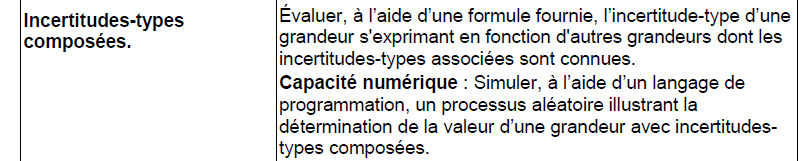

## Contexte expérimental : étude du lacher d'une bille le long d'un rail de longueur d connue

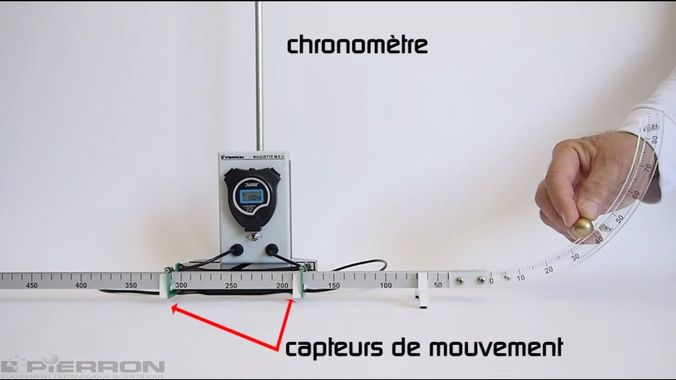

La bille est lachée à partir d'une position donnée, puis passe devant deux capteurs de mouvement. 

Lors du passage de la bille devant le premier capteur, un chronomètre est automatiquement déclenché. 

La bille parcourt alors une distance d = 13,0 cm. L'incertitude-type de la mesure sur d est estimée à 0,2 cm.

Lors du passage de la bille devant le second capteur, le chronomètre est automatiquement arrêté.

La vitesse de la bille est alors simplement calculée à l'aide de la formule 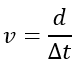

Cette manipulation est répétée 20 fois.

Une mesure (parmi d'autres) de la durée $\Delta$t de parcours de la distance d est de $\Delta$t = 0.18 s. 

## Objectif : écrire un programme permettant de calculer l'incertitude-type d'une grandeur composée

L'expérimentation précédente est simulée à l'aide d'un programme écrit en Python. 

Ce programme doit permettre de calculer l'incertitude-type composée de la grandeur v, connaissant les grandeurs d et $\Delta$t ainsi que leur incertitude-type.

La distance d est supposée constante, ainsi que son incertitude-type.
La mesure de la durée $\Delta$t peut dépendre de certains paramètres expérimentaux et varie légèrement. 

### Génération de l'échantillon $\Delta$t de manière aléatoire

La documentation de la bibliothèque random de Python précise : 


#### Données

**random.uniform(a,b) :** 

   **Renvoie un nombre réel aléatoire N tel que  a <= N <= b**

Remarque : la fonction round a été ajoutée par souci de cohérence physique : sans cette fonction, les temps auraient été générés avec de trop nombreux chiffres non significatifs.

In [1]:
from random import *                           # bibliothèque utile pour générer des nombres aléatoires                      
deltat=[]
for i in range(20) :
    deltat.append(round(uniform(0.14,0.20),2))
print(deltat)

[0.17, 0.18, 0.17, 0.2, 0.17, 0.16, 0.19, 0.2, 0.17, 0.15, 0.2, 0.19, 0.14, 0.16, 0.2, 0.16, 0.16, 0.18, 0.18, 0.15]


### Calcul de l'incertitude-type de la durée $\Delta$t de parcours

Nous utilisons pour cela les fonctions statistiques proposées par la bibliothèque *numpy*.

- la fonction **np.mean(x)** permet de calculer la valeur moyenne de l'échantillon x
- la fonction **np.std(x)** permet de calculer l'écart-type de l'échantillon x
- la fonction **np.sqrt(a)** permet de calculer la racine carrée du nombre a et sera utile lors du calcul de l'incertitude-type de répétabilité.

La fonction **len(x)** permet de calculer l'effectif (nombre de valeurs) de l'échantillon x.

Pour ces trois fonctions, x peut être une liste, un tuple, un tableau numpy. Pour plus de renseignements sur les listes, tuples ou les tableaux numpy, se référer aux **notebooks Listes** et **Tableaux numpy**.

L'incertitude-type de répétabilité a pour formule $U(x)=\frac{écart-type(x)}{\sqrt{effectif(x)}}$

L'ensemble de ces calculs a été regroupé au sein d'une fonction nommée statistique(). Cette fonction prend en paramètre un tableau de valeurs (correspondant aux valeurs de $\Delta$t) et renvoie la valeur moyenne ainsi que l'incertitude type sur $\Delta$t.

In [2]:
import numpy as np                            # bibliothèque utile pour déterminer la valeur moyenne, l'écart-type 
                                              # et l'incertitude-type de répétabilité
def statistique(x):
    moy=np.mean(x)
    ecarttype=np.std(x)
    effectif=len(x)
    incertitudetype=ecarttype/np.sqrt(effectif)
    return(moy,incertitudetype)  

In [3]:
# Appel de la fonction et affectation des valeurs renvoyées par la fonction aux variables deltatmoy et Udeltat
deltatmoy,Udeltat = statistique(deltat)      
print("{0:55}".format("La durée moyenne vaut :"),deltatmoy,"s")
print("{0:55}".format("L'incertitude-type de répétabilité de deltat vaut :"),Udeltat,"s")

La durée moyenne vaut :                                 0.17400000000000002 s
L'incertitude-type de répétabilité de deltat vaut :     0.004024922359499622 s


### Calcul de l'incertitude-type composée de la vitesse moyenne

L'incertitude U(v) sur la vitesse est dite composée car le calcul de la vitesse dépend de deux autres grandeurs, elles-même connues avec une incertitude.

$U(v)=|v| . \sqrt{(\frac{U(t)}{t})^2 + (\frac{U(d)}{d}})^2$

Nous avons fait le choix de laisser les élèves libres d'arrondir eux-mêmes les résultats affichés.

In [4]:
d=0.13
Ud=0.02
vmoy=d/deltatmoy
Uv=abs(vmoy)*np.sqrt((Udeltat/deltatmoy)**2+(Ud/d)**2)
print("vmoy = (",vmoy, "  +/- ",Uv,") m/s")

vmoy = ( 0.7471264367816092   +/-  0.116234521282945 ) m/s


## Programme complet


In [5]:
#Import des bibliothèques
import numpy as np                            # bibliothèque utile pour déterminer la valeur moyenne, l'écart-type 
                                              # et l'incertitude-type de répétabilité
from random import *                          # bibliothèque utile pour générer des nombres aléatoires

#définition de la fonction permettant de calculer les granderus statistiques de la grandeur deltat
def statistique(x):
    moy=np.mean(x)
    ecarttype=np.std(x)
    effectif=len(x)
    incertitudetype=ecarttype/np.sqrt(effectif)
    return(moy,incertitudetype)

#Création des variables et constantes
deltat=[]
for i in range(20) :
    deltat.append(round(uniform(0.14,0.20),2))
print("deltat : ",deltat)
d=0.13
Ud=0.02

#Calcul de l'incertitude-type de la grandeur deltat
# Appel de la fonction et affectation des valeurs renvoyées par la fonction aux variables deltatmoy et Udeltat
deltatmoy,Udeltat = statistique(deltat)      
print("{0:55}".format("La durée moyenne vaut :"),deltatmoy,"s")
print("{0:55}".format("L'incertitude-type de répétabilité de deltat vaut :"),Udeltat,"s")

#Calcul de l'incertitude-type composée de la vitesse
vmoy=d/deltatmoy
Uv=abs(vmoy)*np.sqrt((Udeltat/deltatmoy)**2+(Ud/d)**2)
print("vmoy = (",vmoy, "  +/- ",Uv,") m/s")

deltat :  [0.17, 0.18, 0.17, 0.17, 0.18, 0.15, 0.16, 0.16, 0.18, 0.15, 0.15, 0.2, 0.17, 0.16, 0.16, 0.2, 0.17, 0.19, 0.16, 0.16]
La durée moyenne vaut :                                 0.1695 s
L'incertitude-type de répétabilité de deltat vaut :     0.003276812475562189 s
vmoy = ( 0.7669616519174041   +/-  0.11892203290139584 ) m/s
